In [50]:
import pandas as pd
import numpy as np

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('fraud_detection_dataset.csv')
df.head()

,transaction_amount,user_age,account_age_days,num_transactions_last_24h,is_foreign_transaction,is_high_risk_merchant,device_type,card_present,fraud
0,56.31,68,1204,0,0,1,desktop,1,0
1,361.21,57,2564,1,0,0,mobile,0,0
2,158.01,24,175,3,0,0,mobile,0,0
3,109.55,49,2811,3,0,0,mobile,0,0
4,20.35,65,1976,0,0,0,mobile,1,0


In [53]:
df.isnull().sum()

transaction_amount           0
user_age                     0
account_age_days             0
num_transactions_last_24h    0
is_foreign_transaction       0
is_high_risk_merchant        0
device_type                  0
card_present                 0
fraud                        0
dtype: int64

In [54]:
df.describe()

,transaction_amount,user_age,account_age_days,num_transactions_last_24h,is_foreign_transaction,is_high_risk_merchant,card_present,fraud
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,118.771022,43.187800,1500.354200,2.048400,0.095800,0.147600,0.596800,0.020200
std,118.446096,14.941472,853.911588,1.445294,0.294346,0.354739,0.490589,0.140698
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.540000,30.000000,776.750000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,83.180000,43.000000,1495.000000,2.000000,0.000000,0.000000,1.000000,0.000000
75%,165.445000,56.000000,2232.500000,3.000000,0.000000,0.000000,1.000000,0.000000
max,980.690000,69.000000,2998.000000,8.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_amount         5000 non-null   float64
 1   user_age                   5000 non-null   int64  
 2   account_age_days           5000 non-null   int64  
 3   num_transactions_last_24h  5000 non-null   int64  
 4   is_foreign_transaction     5000 non-null   int64  
 5   is_high_risk_merchant      5000 non-null   int64  
 6   device_type                5000 non-null   object 
 7   card_present               5000 non-null   int64  
 8   fraud                      5000 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 351.7+ KB


In [56]:
df['fraud'].value_counts()#to check the count of fraud and not fraud

fraud
0    4899
1     101
Name: count, dtype: int64

In [57]:
df.shape

(5000, 9)

In [58]:
#now to get the percentage of fraud values
round((df['fraud'].value_counts()[1]/df.shape[0] )* 100)   
#that's 2%, a clear class imbalance.

2

In [59]:
df.columns

Index(['transaction_amount', 'user_age', 'account_age_days',
       'num_transactions_last_24h', 'is_foreign_transaction',
       'is_high_risk_merchant', 'device_type', 'card_present', 'fraud'],
      dtype='object')

In [60]:
features = ['transaction_amount','user_age','account_age_days','num_transactions_last_24h','is_foreign_transaction','is_high_risk_merchant','card_present']
df.groupby('fraud')[features].mean()

,transaction_amount,user_age,account_age_days,num_transactions_last_24h,is_foreign_transaction,is_high_risk_merchant,card_present
fraud,,,,,,,
0,116.546393,43.183711,1502.705042,2.044295,0.086548,0.138804,0.596857
1,226.676535,43.386139,1386.326733,2.247525,0.544554,0.574257,0.594059


In [61]:
corr = df.corr(numeric_only=True)['fraud'].sort_values(ascending=False)#ranking which features influence fraud
print(corr)

fraud                        1.000000
is_foreign_transaction       0.218928
is_high_risk_merchant        0.172712
transaction_amount           0.130820
num_transactions_last_24h    0.019784
user_age                     0.001906
card_present                -0.000802
account_age_days            -0.019176
Name: fraud, dtype: float64


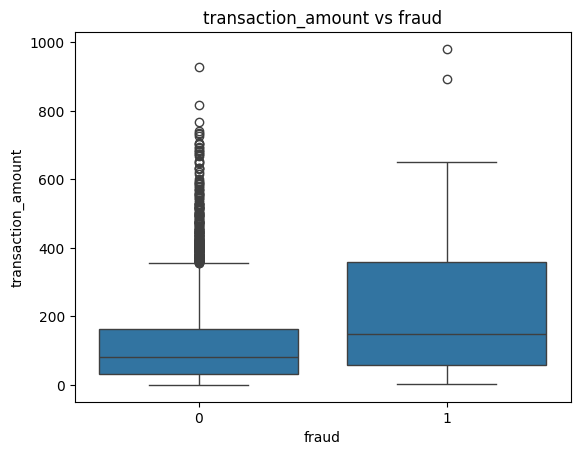

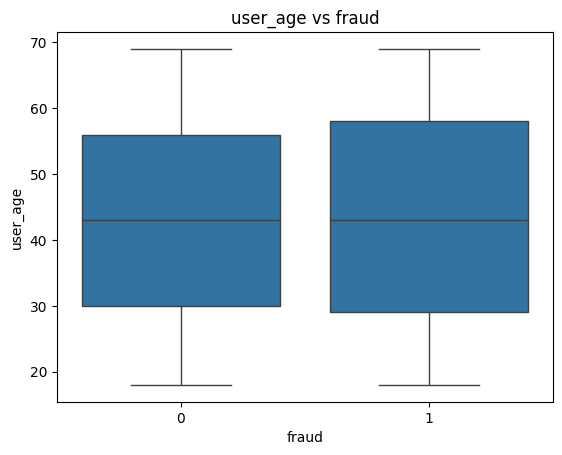

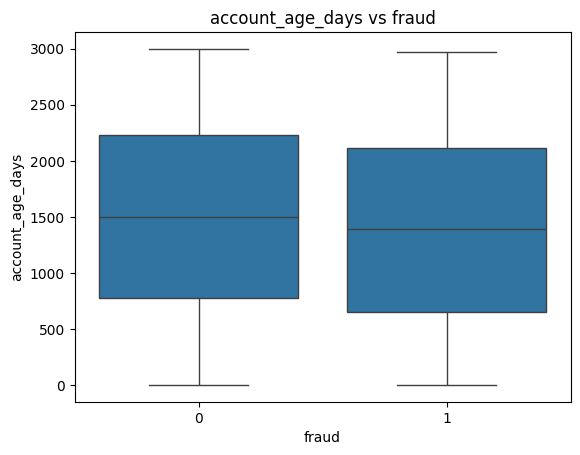

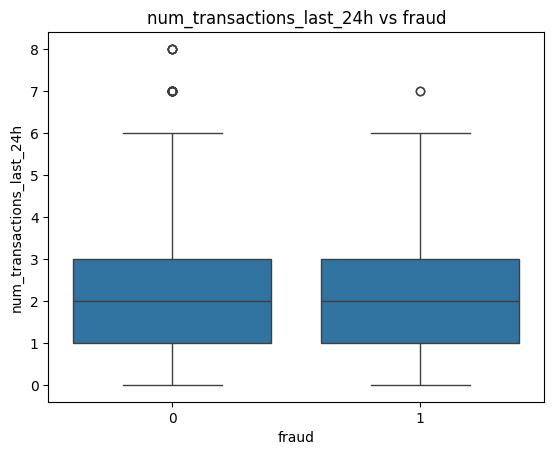

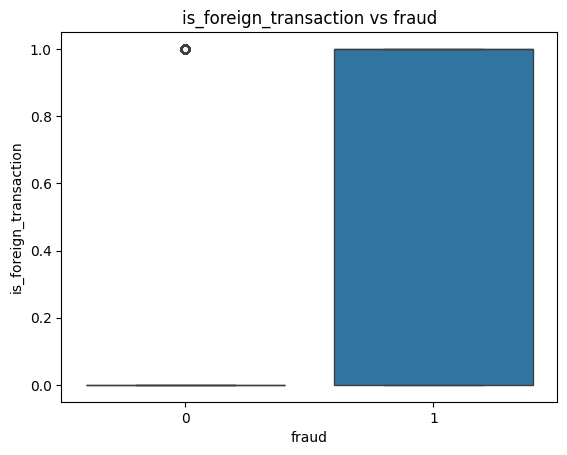

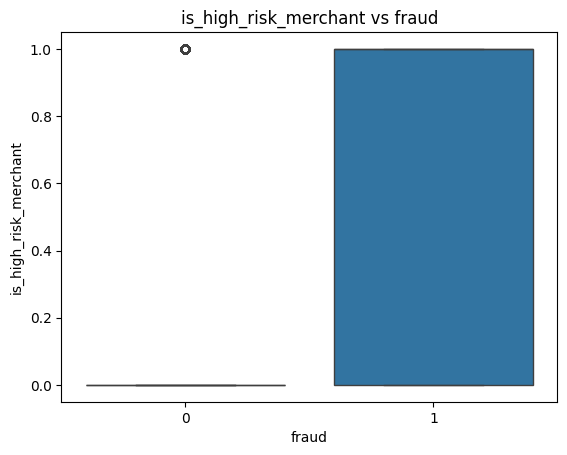

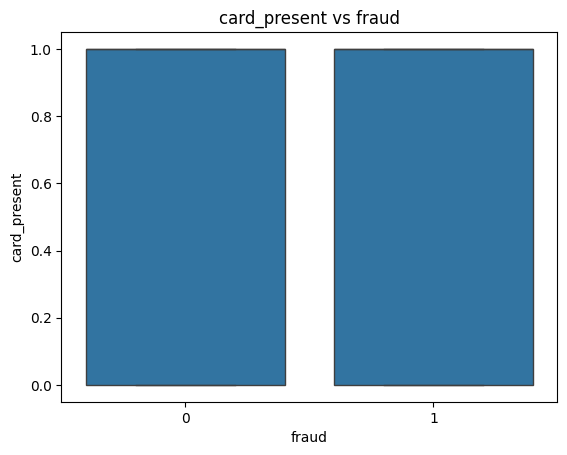

In [62]:
for feature in features:
    sns.boxplot(data=df, x='fraud',y=feature)
    plt.title(f'{feature} vs fraud')
    plt.show()